In [1]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd

from utils.analysys_utils import list_experiments_in_dir

In [2]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_exps", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)


In [10]:


data = {
    "m": [],
    "a": [],
    "val_loss": []
}

for exp in experiments:
    try: # avoid NaNs
        data['val_loss'].append(exp['final']['best_epoch']['val_loss'])    
        data['m'].append(exp['settings']['m'])
        data['a'].append(exp['settings']['a'])
    except:
        print(f"{exp['uuid']}")
    

df = pd.DataFrame(data)
#df

0019e480-e053-40cf-a77c-57e4d1a32c4d
01e83ba4-ecb6-4e28-9e99-d91786435cf5
024cc279-e427-43fc-a869-6cef5632d17c
02705824-7206-451e-b719-95de4429625e
0312603e-ba8f-4eee-b591-1c922cd3fad5
032208e5-0b42-4458-a8f3-881ad262426a
051de440-c632-4634-808e-aab8d75f254e
0533e1ac-ddab-41f9-b42f-d8eec49ba334
05a38188-2762-48a7-bcae-43cdc77e6546
07939854-8186-4b38-bb01-3371f1483534
080e51e9-5791-4f17-a683-3466d7cee540
08b7bb28-f0ea-4ecf-921c-f798023cfa48
08c7982d-abfb-4140-9296-6a05e88f7af1
0a17e9ce-fef3-4d60-9d26-d23892a3464c
0a53c6cf-7544-4db1-8f3d-00747f4416a7
0abe7606-6fca-4dbe-a2cd-43cc5d91d3ca
0b4bd6c5-2233-433d-92c0-319d7ad5ef76
0b88579c-d021-4345-a5d2-3b6b3dcb374f
0b8c86d3-3d2b-4e83-8e6f-2c3040c1786d
0c23b8b2-b1b4-4eda-a9df-6883f2480f31
0c5f7104-7f5b-4c28-8264-bac069e3c263
0c70f5ed-2c0a-41a6-ad26-a8adb88655b7
0c925edb-dba2-4b20-8db2-9a7163f20066
0d9a619a-1106-417b-a1b2-0254663b4b08
0ecb2974-3bda-4479-9591-7046d556b3bb
0f2e2fa9-5da5-4601-8168-20be612a0836
0fced95d-5bd0-4e16-b2d8-abbc5df2e2ff
1

In [28]:
def group_by_and_compute_ci(df, group_by):
    grouped_df = df.groupby(group_by).agg(['mean', 'std', 'count'])['val_loss']
    grouped_df['ci95'] = 1.96 * grouped_df['std'] / grouped_df['count'].pow(0.5)
    return grouped_df


# group by m and a with average
df_by_m_a = group_by_and_compute_ci(df, ['m', 'a'])

# group by a and m with average
df_by_a_m = group_by_and_compute_ci(df, ['a', 'm'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F321898388>,
      dtype=object)

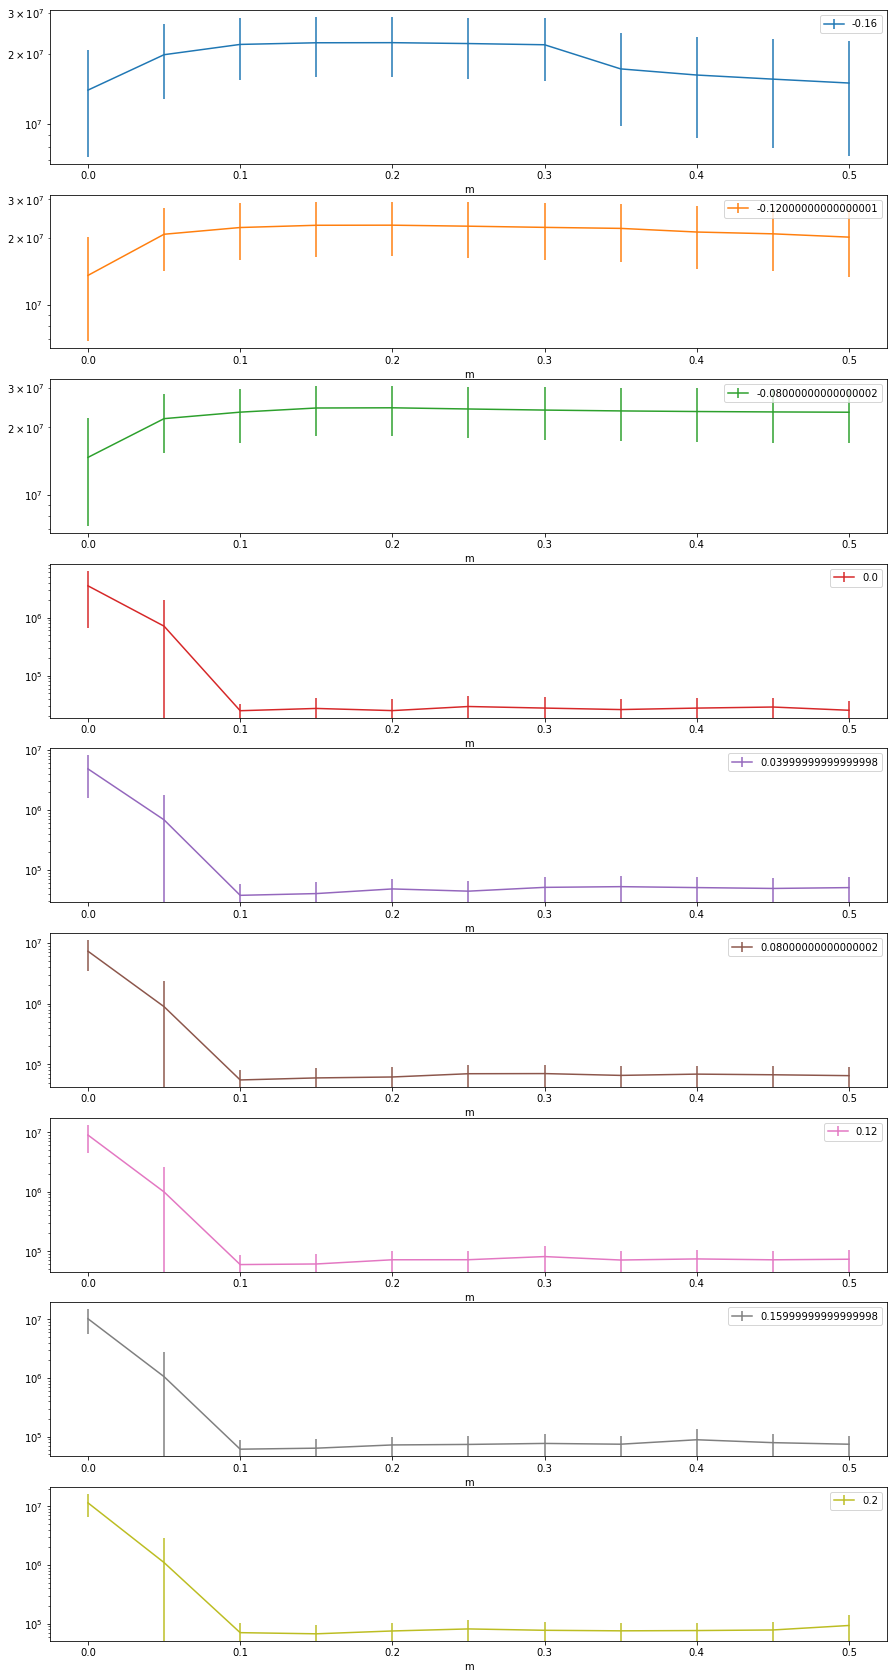

In [35]:
df_by_m_a.unstack()[0:].plot(y='mean', yerr='ci95', logy=True, subplots=True, sharex=False, figsize=(15,30))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F326893688>,
      dtype=object)

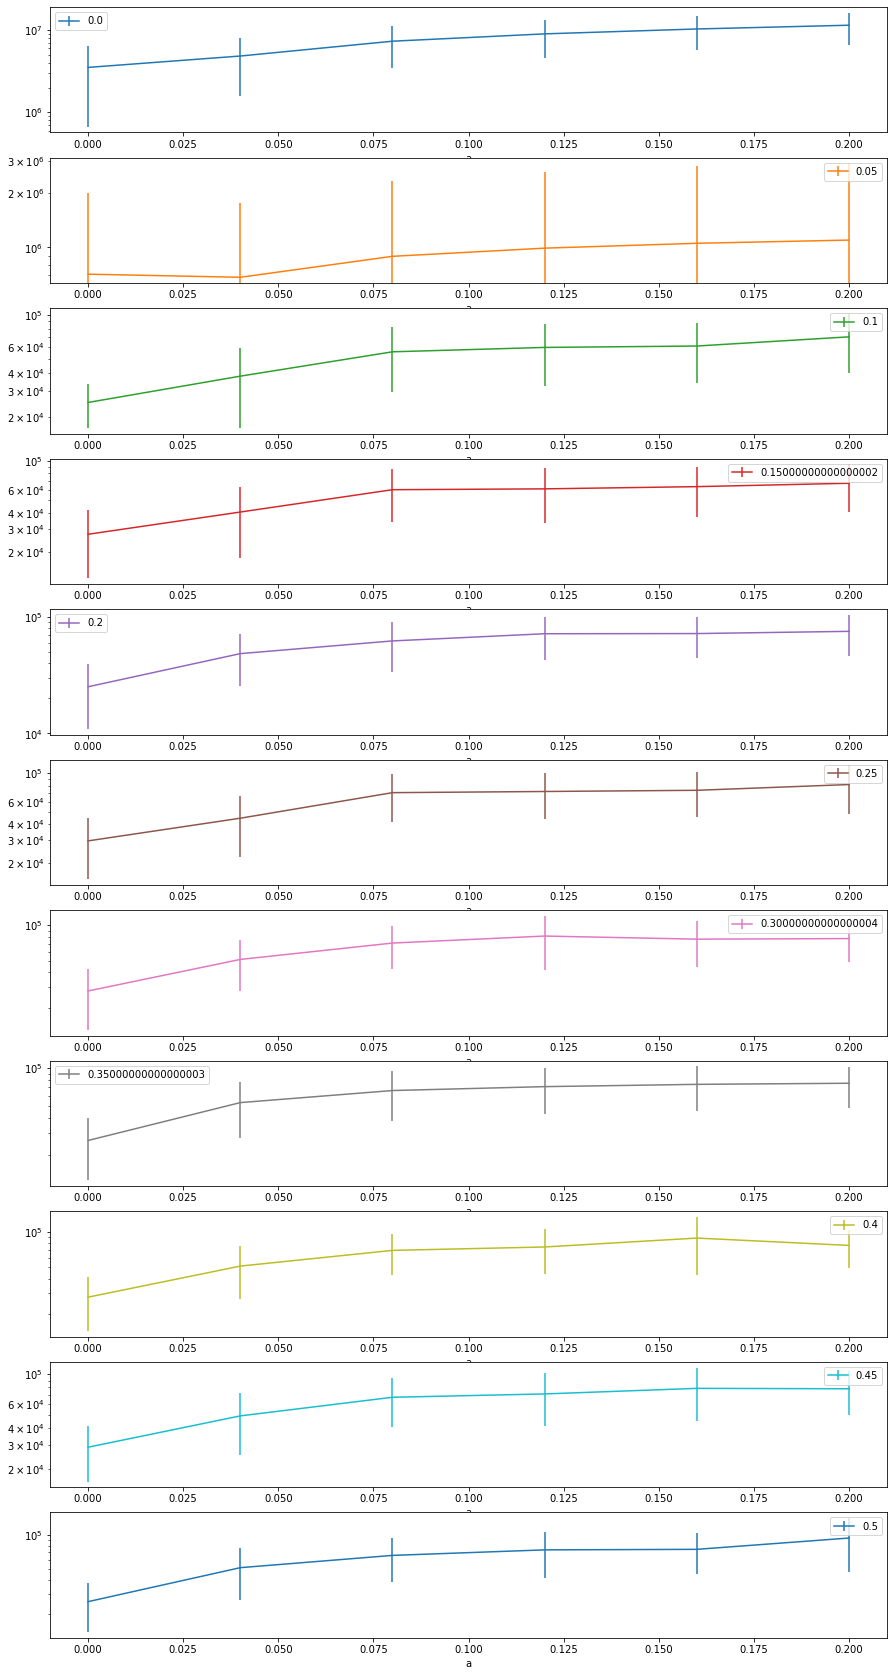

In [36]:
df_by_a_m.unstack()[0:].plot(y='mean', yerr='ci95', logy=True, subplots=True, sharex=False, figsize=(15,30))